# Language Model

In [1]:
pwd

'E:\\Jupyter'

In [2]:
database = 'E:/NLP2019S3/DataSource/sqlResult_1558435.csv' #路径分隔符Linux 

In [3]:
import os

In [4]:
os.path.exists(database)

True

In [5]:
import pandas as pd

In [6]:
dataframe = pd.read_csv(database,encoding='gb18030')

In [7]:
all_articles =dataframe['content'].tolist()

In [8]:
all_articles[:3]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n']

In [9]:
import re

In [10]:
def token(string):
    return ''.join(re.findall('[\w|\d]+',string))

In [11]:
token('\u3000\u3000受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态')

'受到A股被纳入MSCI指数的利好消息刺激A股市场从周三开始再度上演龙马行情周四上午金融股和白马股表现喜人但是尾盘跳水之后仅金融板块仍维系红盘状态'

In [12]:
all_articles =[token(str(a)) for a in all_articles]

In [13]:
all_articles[:2]

['此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息',
 '骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台']

统计文本字符数量：机器运行好慢

In [14]:
import time

In [15]:
#start_time=time.time() 
#print (time.asctime (time.localtime(start_time)))

In [16]:
start_time=time.time() 
text = ''
for a in all_articles[:30000]:
    text += a
print ('length of text :{}'.format(len(text)))
end_time=time.time() 
print (end_time-start_time)

length of text :13230442
28.211912393569946


In [17]:
TEXT=text

In [18]:
from functools import reduce

In [19]:
txt_from_reduce = reduce (lambda a1,a2: a1+a2, all_articles[:10]) #用传给 reduce 中的函数 function（有两个参数）先对集合中的第 1、2 个元素进行操作，
                                                            #\得到的结果再与第三个数据用 function 函数运算

# Get all tokens

In [20]:
import jieba

In [21]:
def cut(string): return list(jieba.cut(string))

In [22]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.678 seconds.
Prefix dict has been built succesfully.


['这是', '一个', '测试']

In [23]:
ALL_TOKENS = cut(TEXT)

In [24]:
valida_tokens=[t for t in ALL_TOKENS if t.strip() and t!='n']

In [25]:
valida_tokens[:20] 

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停']

In [26]:
len(valida_tokens)

6855850

# Get the Frequence of words

In [27]:
from collections import Counter

In [28]:
Counter([1,1,2,1,3,3,5])

Counter({1: 3, 2: 1, 3: 2, 5: 1})

In [29]:
words_count=Counter(valida_tokens) #return a dic-type variable 

In [30]:
type(words_count)

collections.Counter

In [31]:
words_count.most_common(10)

[('的', 302317),
 ('在', 97945),
 ('月', 59747),
 ('了', 55916),
 ('和', 54503),
 ('日', 50132),
 ('是', 46769),
 ('年', 40873),
 ('新华社', 34039),
 ('中', 26512)]

In [32]:
frequency =[f for w, f in words_count.most_common(100)]

In [33]:
len(frequency)

100

In [34]:
x=[i for i in range(len(frequency))]

In [35]:
import matplotlib.pyplot as plt

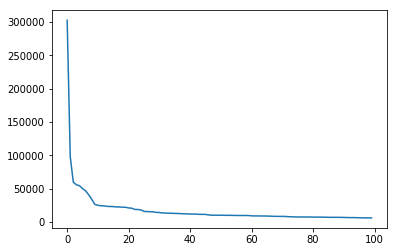

In [36]:
plt.plot(x,frequency)

In [37]:
import numpy as np


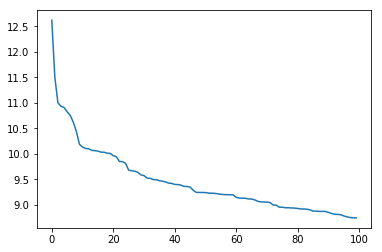

In [38]:
plt.plot(x,np.log(frequency))

In [39]:
frequency_sum=sum([f for w,f in words_count.most_common()])
def get_prob(word):
    esp=1/frequency_sum
    if word in words_count:
        return words_count[word]/frequency_sum
    else :
        return esp

In [40]:
get_prob('肖费')

1.4586083417811067e-07

In [41]:
def product(numbers): return reduce(lambda n1,n2:n1*n2,numbers)

In [42]:
# 没有考虑词组顺序，句子越长概率越小
def language_model_one_gram(string):
    words=cut(string)
    return product([get_prob(w) for w in words] )

In [43]:
language_model_one_gram('长征火箭下周发射')

6.344483782611996e-19

In [44]:
sentences = """
这是一个比较正常的句子
这是一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [45]:
for s in sentences:
    print (s,language_model_one_gram(s))

这是一个比较正常的句子 9.811189457970838e-22
这是一个比较罕见的句子 2.9949946766437296e-22
小明毕业于清华大学 5.181521440749647e-18
小明毕业于秦华大学 1.6497620408567577e-23


In [46]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 4.6355358337211895e-49
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 3.421553888600057e-47
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6448692432043295e-25
---- 真是一只好看的小猫 with probility 6.822127526329342e-22
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.460614959965015e-25
---- 今晚我去吃火锅 with probility 4.429300707327614e-18


# 2-Gram
$$ Pr(S)=Pr(w_1\cdot w_2 \cdots w_n) \sim Pr(w_1) \cdot Pr(w_2|w_1) \cdot Pr(w_3|w_2) \cdot Pr(w_4|w_3)\cdots Pr(w_n|w_n-1) $$

$$ Pr(w_2|w_1) =\frac { Pr(w_1 \cdot w_2)} {Pr(w_1)}$$

In [47]:
valid_tokens=[str(t) for t in valida_tokens]

In [48]:
all_2_grams_words =[''.join(valid_tokens[i:i+2]) for i in range(len(valida_tokens[:-2]))]

In [49]:
_2_gram_sum=len(all_2_grams_words)
_2_gram_counter=Counter(all_2_grams_words)
def get_combination_prob(w1,w2):
    if w1+w2 in _2_gram_counter:return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1/_2_gram_sum
    

In [50]:
def get_prob_2_gram(w1,w2):
    return get_combination_prob(w1,w2)/ get_prob(w1)

In [1]:
get_prob_2_gram('去','沈阳')

NameError: name 'get_prob_2_gram' is not defined

In [52]:
get_prob_2_gram('去','北京')

0.0037196005128420015

In [53]:
get_prob_2_gram('苹果','手机')

0.06090375057637399

In [54]:
get_prob_2_gram('波音','飞机')

0.01840491334457215

In [55]:
def langauge_model_of_2_gram(sentences):
    sentences_probility=1
    words=cut(sentences)
    for i , word in enumerate(words):
        if i==0:
            prob=get_prob(word)
        else:
            previous=words[i-1]
            prob=get_prob_2_gram(previous,word)
        sentences_probility *= prob
        return sentences_probility

def langauge_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [56]:
langauge_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

2.1879125126716598e-06

In [57]:
langauge_model_of_2_gram('小明今天抽奖抽到一台波音飞机')

2.1879125126716598e-06

# 正则表达式

In [58]:
string='***&& ## this is a BIGGGGGGGGGGGGGGGGGGGGGGGGGGg'

In [59]:
pattern='BIG'

In [60]:
pattern='\w+'

In [61]:
re.findall(pattern,string)

['this', 'is', 'a', 'BIGGGGGGGGGGGGGGGGGGGGGGGGGGg']

In [62]:
import requests

In [63]:
url = 'https://movie.douban.com/'

In [64]:
response = requests.get(url)

In [65]:
html_content=response.text

In [66]:
url_pattern = re.compile("https://movie.douban.com/subject/\w+/\?from=showing") # 生成一个正则表达式（ Pattern ）对象

In [67]:
#url_pattern.findall(html_content)

In [68]:
img_pattern = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.\w+') #url 上显示的webp，但实际是jpg

In [69]:
import matplotlib.pyplot as plt

In [70]:
img_pattern.findall(html_content)

['https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551249211.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552522615.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551172384.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549558913.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549523952.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549177902.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549910141.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551693460.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552614343.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

In [71]:
#plt.imshow('https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551249211.jpg') #不成功，需要进一步处理